In [50]:
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import Algorithmia

In [51]:
base_url = 'http://api.genius.com'
genius_id = 'XO--EfuCoziq7UGdadut1RyRIhT9Wg4QyxvXaatsaHdjdAm8_-uKzHc4i8wPgW5F'
genius_secret = 'YLbuxciWe8utBFEqgzNKd6UhhhOqIfSGrC763rnGtMedlmiLEnIYB0MJkFLdHYrTL-5le5Z9QH5CVdOUpfa4jw'
genius_token = 'l2HmJPxr3YN9uFzKeUy4gPCSYSZnkBtdSd0EJ3vJZbRBBX5evlCm1rp-Q-_X_yFl'

In [52]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=genius_token)
}
parameters = {
    'q': '7/11'
}
search_url = base_url + '/search'
response = requests.get(search_url, params=parameters, headers=headers)

In [53]:
data = response.json()
data['response']['hits'][0]['result']['api_path']

'/songs/587286'

In [54]:
def lyrics_from_song_api_path(song_api_path):
  song_url = base_url + song_api_path
  response = requests.get(song_url, headers=headers)
  json = response.json()
  path = json["response"]["song"]["path"]
  #gotta go regular html scraping... come on Genius
  page_url = "http://genius.com" + path
  page = requests.get(page_url)
  html = BeautifulSoup(page.text, "html.parser")
  #remove script tags that they put in the middle of the lyrics
  [h.extract() for h in html('script')]
  #at least Genius is nice and has a tag called 'lyrics'!
  lyrics = html.find('div', class_='lyrics').get_text() #updated css where the lyrics are based in HTML
  return lyrics

In [55]:
lyrics = lyrics_from_song_api_path(data['response']['hits'][0]['result']['api_path'])
lyrics = lyrics.replace('\n', ' ')

In [56]:
lyrics

"  [Pre-Chorus] Shoulders sideways, smack it, smack it in the air Legs movin' side to side, smack it in the air Legs movin' side to side, smack you  in the air Shoulders sideways, smack it, smack it in the air Smack it, smack it in the air, legs movin' side to side Smack it, smack it in the air; smack it, smack it in the air  [Chorus] Wave your hands side to side, put it in the air Wave your hands side to side, put it in the air Clap, clap, clap like you don't care Smack that, clap, clap, clap, like you don't care (I know you care)  [Verse 1] Clap, clap, clap, clap, clap it Foot up, my foot up, hold up now my foot up I'm spinnin' my foot up, foot up yeah my foot up I'm spinnin' my foot up, put my foot down yeah my hands up My hands up, my hands up (flexin') flexin' while my hands up My hands up, my hands up, I stand up with my hands up Then I put up, my hands up, I put up, my hands up I put up, my hands up then I'm spinnin' all my hands up (spinnin') Spinnin' while my hands up (spinnin

In [10]:
input = [
    lyrics.lower(),
]
client = Algorithmia.client('sim75MbSTx0U75XD1VPhjc1rQyX1')
algo = client.algo('nlp/ProfanityDetection/1.0.0')
swear_dict = algo.pipe(input).result

In [26]:
data = {'freq': list(swear_dict.values()), 'words': list(swear_dict.keys())}

In [39]:
df = pd.DataFrame.from_dict(data)
df['words']

0    bitch
1     shit
Name: words, dtype: object

<Figure size 432x288 with 0 Axes>

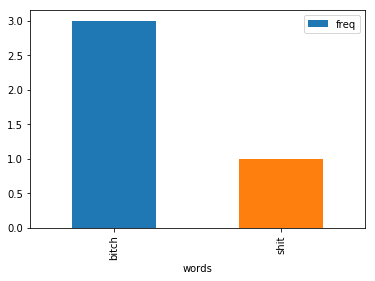

In [46]:
fig = plt.figure()
df.plot(x='words', y='freq', kind='bar')


In [48]:
fig.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
